# Trabalho 3 Métodos Numéricos em Termofluidos

**Nome:** Felipe C. Andrade

**Matrícula:** 17/0162010

**Data:** 13 de março de 2022

In [1]:
import numpy as np
from numpy import pi as PI
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import mpmath as mp
from mpmath import nsum, inf

### Difusão de temperatura unidimensional

#### Introdução

Para discutir o problema unidimensional físicamente, precisamos de um exemplo que aproxime o caso matemático ao mundo físico, uma vez que o mundo físico tem naturalmente três dimensões podendo ser representado, por exemplo, pelos eixos cartesianos (x, y, z), ou seja, não podemos ter um corpo com dimensões em um dos eixos nula, devido principalmente aos limites das escalas sub-atômicas, já que,para que exista um corpo ele deve ser feito de átomos, quarks, prótons, neutrons, etc. Se o corpo não for composto de átomos, ele não é matéria, e portanto a discussão sobre a difusão de temperatura perde o sentido.

Para aproximar o problema ao mundo físico, podemos utilizar do exemplo de uma barra esbelta feita de um material com altos índices de condutividade térmica, o que significa que o problema pode ser aproximado ao modelo matemático unidimensional, uma vez que, as diferenças de temperatura são significativas apenas ao longo do eixo que chamaremos de eixo x.

In [2]:
def finite_diff_unidimensional(Temp, time, dx, dt):
    n = int(len(Temp) - 1)
    t = 0.
    time_len = len(time)
    Temp_new = np.copy(Temp)
    result = np.zeros([time_len, n + 1])
    
    if dt <= (dx ** 2) / 4.:
        while t < time[-1] - .1 * dt:
            for i in range(1, n):
                x_axis = (dt / (dx ** 2)) * (Temp[i + 1] - 2 * Temp[i] + Temp[i - 1])
                Temp_new[i] = Temp[i] + x_axis
            
                for i in range(time_len):
                    # print([time[i] - dt, t, time[i] + dt])
                    # print(t < time[i] + dt  and t > time[i] - dt)
                    if t < time[i] + dt  and t > time[i] - dt:
                        result[i] = np.copy(Temp_new)


            Temp = np.copy(Temp_new)
            t += dt
    
        return result
    else:
        print('something went wrong')
    
def plot_uni(x_arr, result, an_result, title= 'Title', legend= None ):
    marker_style = ['or', 'ok', 'ob', 'oc']
    line_style = ['r', 'k', 'b', 'c']
    fig = plt.figure()
    plt.title(title)
    for i in range(len(result)):
        plt.plot(x_arr, result[i], marker_style[i])
    for i in range(len(an_result)):
        plt.plot(x_arr, an_result[i], line_style[i])

    plt.legend(legend)

### Exercício 1
$$
\frac{\partial T}{\partial t} = \frac{\partial ^ 2T}{\partial t ^2},\ \ 0<x<2, \ \ t > 0
$$
$$
T(0, t) = T(2, t) = 0,\ \ t > 0
$$
$$
T(x, 0) = \sin\bigg(\frac{\pi}{2}x\bigg)
$$

sendo que a solução analítica para o problema é dada por:

$$
T(x, t) = \exp \bigg[\frac{-\pi ^ 2 t}{4}\bigg] \sin \bigg[\frac{\pi x}{2}\bigg]
$$


[0.         0.10973431 0.21814324 0.32391742 0.42577929 0.52249856
 0.61290705 0.6959128  0.77051324 0.83580736 0.89100652 0.93544403
 0.96858316 0.99002366 0.99950656 0.99691733 0.98228725 0.95579301
 0.91775463 0.86863151 0.80901699 0.73963109 0.66131187 0.57500525
 0.48175367 0.38268343 0.27899111 0.1719291  0.        ]


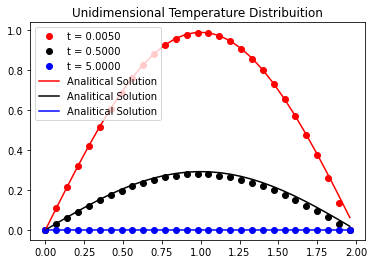

In [3]:
dx = .07
dt = .001

time = [.005, .5, 5.]

x_arr = np.arange(0., 2., dx)

n = len(x_arr)

Temp = np.zeros(n, float)
Temp_init_func = lambda x : np.sin((PI / 2) * x)

Temp = Temp_init_func(x_arr)
Temp[0] = Temp[-1] = 0.

print(Temp)

result = finite_diff_unidimensional(Temp, time, dx, dt)

analitic_result = np.zeros([len(time), n])
Temp_analitic_func = lambda x, t : (np.exp((-(PI ** 2) * t) / 4) * 
                                    np.sin(0.5 * PI * x))
for i in range(len(time)):
    for j in range(n):
        analitic_result[i][j] = Temp_analitic_func(x_arr[j], time[i])

title = 'Unidimensional Temperature Distribuition'
leg = []
for i in range(len(time)):
    leg.append(f't = {time[i]:.4f}')
    
for i in range(len(analitic_result)):
    leg.append(f'Analitical Solution')
    
plot_uni(x_arr, result, analitic_result, title, leg)
plt.show()

#### Discussão

Podemos interpretar este problema fisicamente para confirmar intuitivamente o que está acontecendo no problema. Como o problema é unidimensional, isto é temos somente a dimensão x, vamos considerar que o problema se trata de uma barra esbelta de dimensões y e z desprezíveis, cujas faces são perfeitamente isoladas e as extremidades são mantidas a uma temperatura constante "0"(como adimensionalizamos a temperatura, zero aqui significa somente que ela está em equilibrio com o ambiente e não necessáriamente alguma temperatura específica em uma escala específica, na prática esta temperatura pode ser 0ºC, 25ºC, 89ºF ou qualquer temperatura em qualquer escala arbitrária).

Pelas definições do problema, nós temos uma aplicação de calor inicial na barra de forma que sua distribuição de temperatura siga a condição de contorno temporal:

$$
T(x, 0) = \sin\bigg(\frac{\pi}{2}x\bigg)
$$

Como nas condições de contorno espaciais que independem do tempo, as únicas definições são que as extremidades da barra estão em uma temperatura igual a zero, é de se esperar que o comportamento da barra seja reduzir homogêneamente sua temperatura ao passo que ela perde calor para as extremidades à $T = 0$, uma vez que não mantemos a aplicação de calor para manter a distribuição de temperatura original.

Isso é exatamente o que observamos no gráfico, no tempo $t = 0,005$ temos uma distribuição de temperatura próxima das condições iniciais, e ela lentamente e homogêneamente se reduz ($t = 0,5$) até que em algum momento ela se estabiliza e entra em equilíbrio com o ambiente (como o problema é 1D, neste caso ambiente se refere às extremidades)

### Exercício 2

$$
\frac{\partial T}{\partial t} = \frac{\partial ^ 2T}{\partial t ^2},\ \ 0<x<1, \ \ t > 0
$$
$$
T(0, t) = T(1, t) = 0,\ \ t \geq 0
$$
$$
T(x, 0) = 1,\ \ 0 < x < 1
$$

sendo que a solução analítica para o problema é dada por:

$$
T(x, t) = \sum ^ \infty _{n=1} \frac{4}{(2n - 1)\pi} \sin[(2n - 1)\pi x]\exp[-(2n - 1)^2 \pi^2 t]
$$


In [4]:
def finite_diff_unidimensional_ex_2(Temp, time, dx, dt):
    n = int(len(Temp) -1)
    t = 0.
    time_len = len(time)
    Temp_new = np.copy(Temp)
    result = np.zeros([time_len, n + 1])
    
    if dt <= (dx ** 2) / 4.:
        while t < time[-1] - .1 * dt:
            Temp[0] = Temp[-1] = 0.
            for i in range(1, n):
                x_axis = (dt / (dx ** 2)) * (Temp[i + 1] - 2 * Temp[i] + Temp[i - 1])
                Temp_new[i] = Temp[i] + x_axis
            
                for i in range(time_len):
                    # print([time[i] - dt, t, time[i] + dt])
                    # print(t < time[i] + dt  and t > time[i] - dt)
                    if t < time[i] + dt  and t > time[i] - dt:
                        result[i] = np.copy(Temp_new)


            Temp = np.copy(Temp_new)
            t += dt
    
        return result
    else:
        print('something went wrong')
        
def plot_uni_ex_2(x_arr, x_arr_an, result, an_result, title= 'Title', legend= None ):
    marker_style = ['or', 'ok', 'ob', 'oc']
    line_style = ['r', 'k', 'b', 'c']
    fig = plt.figure()
    plt.xlabel('$x$ coordinate')
    plt.ylabel('Temperature $T$')
    plt.title(title)
    for i in range(len(result)):
        plt.plot(x_arr, result[i], marker_style[i])
    for i in range(len(an_result)):
        plt.plot(x_arr_an, an_result[i], line_style[i])

    plt.legend(legend)

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
Resultado para tempo 0.005:
[0.         0.3523941  0.64071655 0.83293152 0.93643188 0.98078918
 0.99557495 0.99927139 0.99992371 0.99999619 0.99999619 0.99992371
 0.99927139 0.99557495 0.98078918 0.93643188 0.83293152 0.64071655
 0.3523941  0.        ]
Resultado para tempo 0.05:
[0.         0.12140993 0.23923277 0.35004565 0.45073374 0.53859732
 0.61141421 0.6674582  0.70548351 0.72469058 0.72469058 0.70548351
 0.6674582  0.61141421 0.53859732 0.45073374 0.35004565 0.23923277
 0.12140993 0.        ]
Resultado para tempo 0.15:
[0.         0.03991828 0.07874769 0.11542904 0.14896177 0.17843118
 0.20303343 0.22209746 0.23510326 0.24169607 0.24169607 0.23510326
 0.22209746 0.20303343 0.17843118 0.14896177 0.11542904 0.07874769
 0.03991828 0.        ]
Resultado para tempo 5.0:
[0.00000000e+00 3.51834094e-25 6.94071071e-25 1.01737560e-24
 1.31292877e-24 1.57266867e-24 1.78951027e-24 1.95753869e-24
 2.07217056e-24 2.13027902e-24 2.

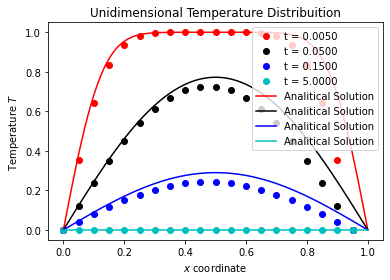

In [5]:
dx = .05
dt = .000625

time = [.005, .05, .15, 5.]

x_arr = np.arange(0., 1., dx)
x_arr_an = np.linspace(0., 1., 100)

n = len(x_arr)

Temp = np.zeros(n, float)
for i in range(n):
    Temp[i] = 1.
Temp[0] = Temp[-1] = 0.

print(Temp)

result = finite_diff_unidimensional_ex_2(Temp, time, dx, dt)
for i in range(len(result)):
    print(f'Resultado para tempo {time[i]}:\n{result[i]}')

analitic_result = np.zeros([len(time), len(x_arr_an)])
Temp_analitic_func = lambda x, t : (np.exp((-(PI ** 2) * t) / 4) * 
                                    np.sin(0.5 * PI * x))
for i in range(0, len(time)):
    for j in range(0, len(x_arr_an)):
        analitic_result[i][j] = nsum(lambda n : (4 / (((2 * n) - 1) * PI)) *
                                      mp.sin(((2 * n) - 1) * PI * x_arr_an[j]) *
                                      mp.exp(- (((2 * n )- 1) ** 2) * (PI ** 2) * time[i])
                                      , [1, inf])

title = 'Unidimensional Temperature Distribuition'
leg = []
for i in range(len(time)):
    leg.append(f't = {time[i]:.4f}')
    
for i in range(len(analitic_result)):
    leg.append(f'Analitical Solution')
    
plot_uni_ex_2(x_arr, x_arr_an, result, analitic_result, title, leg)
plt.show()


#### Discussão 

Bem como no exercício 1, estamos tratanto de uma caso unidimensional, contudo desta vez temos um aquecimento inicial uniforme em todo o comprimento da nossa ilustrativa barra esbelta isolada perfeitamente ao longo de seu comprimento. 
Além disto, sabemos pelas condições de contorno que as extremidades estão em equilíbrio termodinâmico com o ambiente em uma.

Intuitivamente, esperamos que o calor seja dissipado pelas extremidades, que a temperatura no centro da barra seja maior do que o das extremidades, e que a temperatura vá progressivamente sendo reduzida, com maior intensidade nos pontos mais próximos das extremidades e com menor intensidade nos pontos mais distantes das extremidades.Vemos este comportamento em ambas as soluções analítica e numérica

Ao observar o gráfico, podemos notar, entretanto, que os dois tipos de solução não se alinham de forma "perfeitamente". Obviamente não se pode dizer que em algum momento a solução numérica se alinhará perfeitamente à solução analítica em função dos erros gerados pelas as aproximações numéricas que realizamos, contudo da forma que estão postos os desalinhamentos, há o indício de que ocorreu algum tipo de erro no desenvolvimento da solução. 

Hipotetizando a razão desta discrepância de resultados, ela pode se dever ao fato de que as soluções numéricas possuem um elemento à menos por algum motivo, de forma que a barra na solução numérica não tem exatamente o comprimento de 1., o que levaria as soluções numéricas a desviarem das soluções analíticas reduzindo a base da curva formada, que é o que podemos ver.


### Exercício 3
$$
\frac{\partial T}{\partial t} = \frac{\partial ^ 2T}{\partial t ^2},\ \ 0<x<1, \ \ t > 0
$$
$$
T(0, t) = 1, \ T(1, t) = 0,\ \ t \geq 0
$$
$$
T(x, 0) = 0,\ \ 0 < x < 1
$$

sendo que a solução analítica para o problema é dada por:

$$
T(x, t) = 1 - x - \sum ^ \infty _{n=1} \frac{2}{n \pi} \sin[n \pi x]\exp[-n^2 \pi^2 t]
$$

In [6]:
def finite_diff_unidimensional_ex_3(Temp, time, dx, dt):
    n = int(len(Temp) - 1)
    t = 0.
    time_len = len(time)
    Temp_new = np.copy(Temp)
    result = np.zeros([time_len, n + 1])
    
    if dt <= (dx ** 2) / 4.:
        while t < time[-1] - .1 * dt:
            Temp[0] = 1.
            Temp[-1] = 0.
            # print(t)
            for i in range(1, n):
                x_axis = (dt / (dx ** 2)) * (Temp[i + 1] - 2 * Temp[i] + Temp[i - 1])
                Temp_new[i] = Temp[i] + x_axis

                # print(Temp_new)
                
                for i in range(time_len):
                    # print([time[i] - dt, t, time[i] + dt])
                    # print(t < time[i] + dt  and t > time[i] - dt)
                    if t < time[i] + dt  and t > time[i] - dt:
                        result[i] = np.copy(Temp_new)


            Temp = np.copy(Temp_new)
            t += dt
    
        return result
    else:
        print('something went wrong')

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Resultado para tempo 0.005:
[1.00000000e+00 5.40391355e-01 2.18995636e-01 6.32802417e-02
 1.22062347e-02 1.40160375e-03 7.22476158e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Resultado para tempo 0.05:
[1.         0.82741539 0.66279124 0.51300687 0.38301962 0.27543099
 0.1905082  0.12658924 0.08071724 0.04932584 0.0288263  0.01600829
 0.00823122 0.00343219 0.        ]
Resultado para tempo 5.0:
[1.         0.92857143 0.85714286 0.78571429 0.71428571 0.64285714
 0.57142857 0.5        0.42857143 0.35714286 0.28571429 0.21428571
 0.14285714 0.07142857 0.        ]


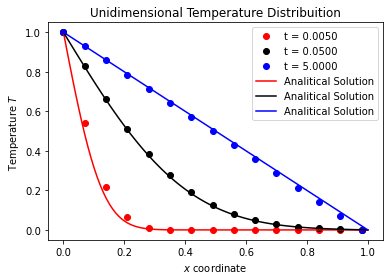

In [7]:
dx = .07
dt = .001

time = [.005, .05, 5.]

x_arr = np.arange(0., 1., dx)
x_arr_an = np.linspace(0., 1., 100)

n = len(x_arr)

Temp = np.zeros(n, float)
# for i in range(n):
#     Temp[i] = 0.
Temp[0] = 1.
Temp[-1] = 0.

print(Temp)

result = finite_diff_unidimensional_ex_3(Temp, time, dx, dt)
for i in range(len(result)):
    print(f'Resultado para tempo {time[i]}:\n{result[i]}')

analitic_result = np.zeros([len(time), len(x_arr_an)])
Temp_analitic_func = lambda x, t : (np.exp((-(PI ** 2) * t) / 4) * 
                                    np.sin(0.5 * PI * x))
for i in range(0, len(time)):
    for j in range(0, len(x_arr_an)):
        analitic_result[i][j] = 1 - x_arr_an[j] - nsum(lambda n : ( 
                                     ((2 / (n * PI)) *
                                      mp.sin(n * PI * x_arr_an[j]) *
                                      mp.exp(- (n ** 2) * (PI ** 2) * time[i])))
                                      , [1, inf])

title = 'Unidimensional Temperature Distribuition'
leg = []
for i in range(len(time)):
    leg.append(f't = {time[i]:.4f}')
    
for i in range(len(analitic_result)):
    leg.append(f'Analitical Solution')
    
plot_uni_ex_2(x_arr, x_arr_an, result, analitic_result, title, leg)
plt.show()

#### Discussão

No exercício 3, começamos com uma barra em equilíbrio térmico com o ambiente $T(x, 0) = 0$ e que no momento que começamos a análise fazemos com que sua extremidade esquerda entre em contato com um corpo com uma temperatura igual a 1.0, isto é, $T(0, n \cdot dt) = 1.0$, e simultâneamente fazemos com que a extremidade direita seja colocada em contato com um corpo à uma temperatura em equilíbrio térmico com o ambiente - $T(1, n \cdot dt) = 1.0$.

Intuitivamente, esperamos que, à princípio, o calor seja dissipado da extremidade esquerda para a extremidade direita, progressivamente elevando a temperatura dos pontos entre as duas extremidades. Como a extremidade direita é mantida em equilíbrio térmico com o ambiente, não esperamos que a barra inteira entre em um equilíbrio térmico em que todos seus pontos assumem temperaturas iguais, mas sim que um gradiente de temperatura seja formado.

Podemos observar este comportamento no gráfico, a medida que o regime transiente progride no tempo, nos aproximamos de um gradiente de temperatura - o esperado para um regime permanente.

### Exercício 4
$$
\frac{\partial T}{\partial t} = 0.01\frac{\partial ^ 2T}{\partial t ^2},\ \ 0<x<1, \ \ t > 0
$$
$$
T(0, t) =  T(1, t) = 0,\ \ t \geq 0
$$
$$
T(x, 0) = 200 x,\ \ 0 \leq x \leq 0.5
$$
$$
T(x, 0) = 200 (1 - x),\ \ 0.5 < x \leq 1
$$

sendo que a solução analítica para o problema é dada por:

$$
T(x, t) = \frac{800}{\pi ^2} \sum ^ \infty _{n=0} \frac{(-1)^n}{(2 n + 1) ^2} \sin[(2 n + 1) \pi x]\exp[-(2 n + 1)^2 \pi^2 t]
$$

In [8]:
def finite_diff_unidimensional_ex_4(Temp, time, dx, dt):
    n = int(len(Temp) - 1)
    t = 0.
    time_len = len(time)
    Temp_new = np.copy(Temp)
    result = np.zeros([time_len, n + 1])
    
    if dt <= (dx ** 2) / 4.:
        while t < time[-1] - .1 * dt:
            Temp[0] = 0.
            Temp[-1] = 0.
            # print(t)
            for i in range(1, n):
                x_axis = .01 * (dt / (dx ** 2)) * (Temp[i + 1] - 2 * Temp[i] + Temp[i - 1])
                Temp_new[i] = Temp[i] + x_axis

                # print(Temp_new)
                
                for i in range(time_len):
                    # print([time[i] - dt, t, time[i] + dt])
                    # print(t < time[i] + dt  and t > time[i] - dt)
                    if t < time[i] + dt  and t > time[i] - dt:
                        result[i] = np.copy(Temp_new)


            Temp = np.copy(Temp_new)
            t += dt
    
        return result
    else:
        print('something went wrong')

[ 0. 14. 28. 42. 56. 70. 84. 98. 88. 74. 60. 46. 32. 18.  0.]
Resultado para tempo 0.005:
[ 0.         14.         28.         42.         55.99999999 69.99999596
 83.99851618 97.70884965 87.95003299 73.99974877 59.99999932 45.99999933
 31.99975281 17.95151681  0.        ]
Resultado para tempo 0.05:
[ 0.         14.         27.99999997 41.99999829 55.99991032 69.99630877
 83.88747825 95.71474229 87.51032326 73.97767188 59.99928299 45.99937096
 31.98136308 17.62284502  0.        ]
Resultado para tempo 5.0:
[ 0.         10.73778528 20.98093398 30.24559372 38.07402606 44.0568089
 47.86070857 49.25764292 48.14837299 44.57516203 38.72040161 30.89196927
 21.49928712 11.0254497   0.        ]
Resultado para tempo 20.0:
[ 0.          2.35674622  4.59536485  6.6036419   8.28089597  9.54302252
 10.32671121 10.59262489 10.32738008  9.5442278   8.28239892  6.60514485
  4.59657012  2.3574151   0.        ]


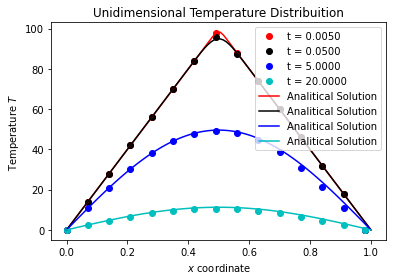

In [9]:
dx = .07
dt = .001

time = [.005, .05, 5., 20.]

x_arr = np.arange(0., 1., dx)
x_arr_an = np.linspace(0., 1., 100)

n = len(x_arr)

Temp = np.zeros(n, float)
Temp[: round(n / 2)] = 200 * x_arr[: round(n / 2)]
Temp[round(n / 2):] = 200 * (1 - x_arr[round(n / 2):])
Temp[0] = 0.
Temp[-1] = 0.

print(Temp)

result = finite_diff_unidimensional_ex_4(Temp, time, dx, dt)
for i in range(len(result)):
    print(f'Resultado para tempo {time[i]}:\n{result[i]}')

analitic_result = np.zeros([len(time), len(x_arr_an)])
Temp_analitic_func = lambda x, t : (np.exp((-(PI ** 2) * t) / 4) * 
                                    np.sin(0.5 * PI * x))
for i in range(0, len(time)):
    for j in range(0, len(x_arr_an)):
        analitic_result[i][j] = (800 / (PI ** 2)) * nsum(lambda n : ( 
                                     (((-1) ** n) / ((2 * n + 1) ** 2)) *
                                      mp.sin((2 * n + 1) * PI * x_arr_an[j]) *
                                      mp.exp(- ((2 * n + 1) ** 2) * (PI ** 2) * 0.01 * time[i]))
                                      , [0, inf])

title = 'Unidimensional Temperature Distribuition'
leg = []
for i in range(len(time)):
    leg.append(f't = {time[i]:.4f}')
    
for i in range(len(analitic_result)):
    leg.append(f'Analitical Solution')
    
plot_uni_ex_2(x_arr, x_arr_an, result, analitic_result, title, leg)
plt.show()

#### Discussão

No exercício 4, é apresentado um caso que pode ser ilustrado pela seguinte situação:

Primeiramente colocamos um corpo extremamente fino em uma temperatura $T_h$ em contato com uma barra à temperatura ambiente $T_c$. O contato foi mantido até que os gradientes de temperatura fossem formados e mantidos em regime permanente.

No momento, em que começamos nossa análise o corpo é removido, e da mesma forma que nos demais casos, esperamos que a barra eventualmente entre em equilíbrio térmico com suas extremidades, que é o comportamente que vemos no gráfico. A medida que o tempo passa, a temperatura de cada ponto da barra tende a chegar a zero.

### Exercício 5
$$
\frac{\partial T}{\partial t} = 0.01\frac{\partial ^ 2T}{\partial t ^2},\ \ 0<x<0.5, \ \ t > 0
$$
$$
T(0, t) =  0, \ \frac{\partial T}{\partial x} (0.5, t)= 0,\ \ t > 0
$$
$$
T(x, 0) = 200 x,\ \ 0 \leq x \leq 0.5
$$


sendo que a solução analítica para o problema é dada por:

$$
T(x, t) = \frac{800}{\pi ^2} \sum ^ \infty _{n=0} \frac{(-1)^n}{(2 n + 1) ^2} \sin[(2 n + 1) \pi x]\exp[-(2 n + 1)^2 \pi^2 t]
$$

In [10]:
def finite_diff_unidimensional_ex_5(Temp, time, dx, dt):
    n = int(len(Temp) - 1)
    t = 0.
    time_len = len(time)
    Temp_new = np.copy(Temp)
    result = np.zeros([time_len, n + 1])
    
    if dt <= (dx ** 2) / 4.:
        while t < time[-1] - .1 * dt:
            Temp[0] = 0.
            # print(t)
            for i in range(1, n):
                x_axis = .01 * (dt / (dx ** 2)) * (Temp[i + 1] - 2 * Temp[i] + Temp[i - 1])
                Temp_new[i] = Temp[i] + x_axis

                # print(Temp_new)

            Temp_new[-1] = (Temp[-1] + (.01 *(dt / (dx ** 2)) * 
                                        ( 2 * Temp[-2] - 2 * Temp[-1] )))
            
            for i in range(time_len):
                # print([time[i] - dt, t, time[i] + dt])
                # print(t < time[i] + dt  and t > time[i] - dt)
                if t < time[i] + dt  and t > time[i] - dt:
                    result[i] = np.copy(Temp_new)


            Temp = np.copy(Temp_new)
            t += dt
    
        return result
    else:
        print('something went wrong')

[ 0. 14. 28. 42. 56. 70. 84. 98.]
Resultado para tempo 0.005:
[ 0.         14.         28.         42.         55.99999999 69.99999528
 83.99826966 97.66061299]
Resultado para tempo 0.5:
[ 0.         13.99880095 27.99113488 41.9436566  55.69394333 68.61106399
 78.87911727 83.13635948]
Resultado para tempo 5.0:
[ 0.         10.57351359 20.64243711 29.71633078 37.33718623 43.10367907
 46.69964425 47.92172377]
Resultado para tempo 50.0:
[0. 0. 0. 0. 0. 0. 0. 0.]


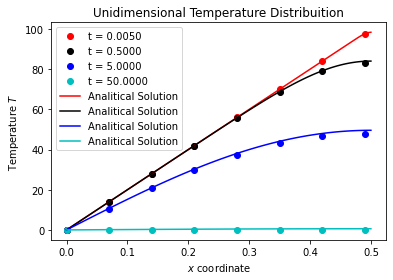

In [11]:
dx = .07
dt = .001

time = [.005, .5, 5., 50.]

x_arr = np.arange(0., .5, dx)
x_arr_an = np.linspace(0., .5, 100)

n = len(x_arr)

Temp = np.zeros(n, float)
Temp = 200 * x_arr
Temp[0] = 0.

print(Temp)

result = finite_diff_unidimensional_ex_5(Temp, time, dx, dt)
for i in range(len(result)):
    print(f'Resultado para tempo {time[i]}:\n{result[i]}')

analitic_result = np.zeros([len(time), len(x_arr_an)])
Temp_analitic_func = lambda x, t : (np.exp((-(PI ** 2) * t) / 4) * 
                                    np.sin(0.5 * PI * x))
for i in range(0, len(time)):
    for j in range(0, len(x_arr_an)):
        analitic_result[i][j] = (800 / (PI ** 2)) * nsum(lambda n : ( 
                                     (((-1) ** n) / ((2 * n + 1) ** 2)) *
                                      mp.sin((2 * n + 1) * PI * x_arr_an[j]) *
                                      mp.exp(- ((2 * n + 1) ** 2) * (PI ** 2) * 0.01 * time[i]))
                                      , [0, inf])

title = 'Unidimensional Temperature Distribuition'
leg = []
for i in range(len(time)):
    leg.append(f't = {time[i]:.4f}')
    
for i in range(len(analitic_result)):
    leg.append(f'Analitical Solution')
    
plot_uni_ex_2(x_arr, x_arr_an, result, analitic_result, title, leg)
plt.show()

#### Discussão

No exercício 5, temos uma condição de contorno diferente das demais previamente utilizadas nos outros exercícios, ela dita que:

$$
\frac{\partial T}{\partial x} (0.5, t)= 0
$$

O que podemos interpretar fisicamente como, "a variação de temperatura na extremidade direita $x = 0.5$ é nula à todo momento em análise", em outras palavras, esperamos que a transferência de calor para a barra através da extremidade direita não aconteça. Desta forma, com o passar do tempo a barra inteira tenderá a assumir a temperatura da extremidade esquerda. Que é o que podemos observar no gráfico.

Inicialmente temos uma barra com duas extremidades com temperaturas diferentes (lado esquerdo fechado para trocas mássicas e aberto a transferência de calor à uma temperatura menor e lado direito completamente isolado à uma temperatura maior), como o lado direito da barra está térmicamente isolado, a barra inteira perderá calor através do lado esquerdo, até que o sistema entre em equilíbrio térmico com o ambiente.

Este é um comportamento esperado (com suas devidas simplificações, é claro) para por exemplo uma garrafinha térmica, a qual perde calor em taxas maiores pela parte de cima e se fosse possível medir a temperatura em uma posição fixa radial, veríamos que a temperatura se comportaria de forma parecida com este gráfico.


### Difusão de Temperatura bidimensional

#### Introdução

O caso bidimensional já é mais palpável para analisarmos físicamente, podemos utilizar exemplos como uma chapa fina com material com bons índices de condutividade, ou então o corte transversal de uma cavidade quadrada com um fluido com velocidade nula, ou até mesmo o corte transversal de temperatura de um bloco qualquer.

Vamos, entretanto, utilizar do exemplo de uma chapa fina por ser mais intuitivo.

In [12]:

def finite_diff_bidimensional(Temp, time, dx, dy, dt):
    n = len(Temp) - 1
    m = len(Temp[0]) - 1
    time_len = len(time)
    t = 0.
    Temp_new = np.copy(Temp)
    result = np.zeros([time_len, n + 1, m + 1])
        
    
    if dt <= (dx ** 2) / 4.  and dt <= (dy ** 2) / 4.:
        while t < time[-1] - 0.1 * dt:
            # print(f'Time = {t:.3f}')
            for i in range(1, n):
                for j in range(1, m):
                    x_axis = (dt / (dx ** 2)) * (Temp[i + 1][j] - 2 * Temp[i][j] + Temp[i - 1][j])
                    y_axis = (dt / (dx ** 2)) * (Temp[i][j + 1] - 2 * Temp[i][j] + Temp[i][j - 1])
                    Temp_new[i][j] = Temp[i][j] + x_axis + y_axis
                    
            for i in range(time_len):
                # print([time[i] - dt, t, time[i] + dt])
                # print(t < time[i] + dt  and t > time[i] - dt)
                if t < time[i] + dt  and t > time[i] - dt:
                    result[i] = np.copy(Temp_new[::-1])
                    # print(result[i])
                
            Temp = np.copy(Temp_new)
            t += dt
        
        return result
    
def plot_cmap(leg, result):
    '''Helper function to plot temperature color maps based on specific points in time'''
    # Creating a Blue to Orange color map 
    top = cm.get_cmap('Blues', 128)
    bottom = cm.get_cmap('Oranges_r', 128)
    new_colors = np.vstack((top(np.linspace(1, 0, 128)), bottom(np.linspace(1, 0, 128))))
    newcmp = ListedColormap(new_colors, name='BlueOrange')
    colormaps = [newcmp]
    
    cmap_len = len(colormaps)

    
    for i in range(len(result)):
        fig, axs = plt.subplots(1, cmap_len, figsize= (cmap_len * 2 + 2, 3), constrained_layout= True, squeeze= False)
        plt.title(leg[i])
        for [ax, cmap] in zip(axs.flat, colormaps):
            psm = ax.pcolormesh(result[i], cmap= cmap, rasterized= True, vmin= 0, vmax= 1)
            fig.colorbar(psm, ax= ax)

### Exercício 6
$$
\frac{\partial T}{\partial t} = \frac{\partial ^ 2T}{\partial x ^2} + \frac{\partial ^ 2T}{\partial y ^2},\ \ 0<x<1, \ \ t > 0
$$
$$
T(x, 0, t) =  0, \ 0 \leq x \leq 1,\ \ t \geq 0
$$
$$
T(x, 1, t) =  sin(\pi x), \ 0 \leq x \leq 1,\ \ t \geq 0
$$
$$
T(0, y, t) = 0, \ 0 < y < 1,\ \ t \geq 0
$$
$$
T(1, y, t) = 0, \ 0 < y < 1,\ \ t \geq 0
$$



sendo que a solução analítica para o problema é dada por:

$$
T(x, y, t \rightarrow \infty) = \frac{\sinh(\pi y) \sin(\pi x)}{\sinh(\pi)}
$$


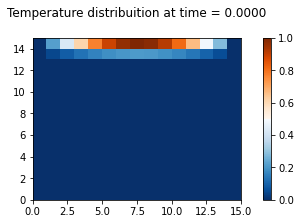

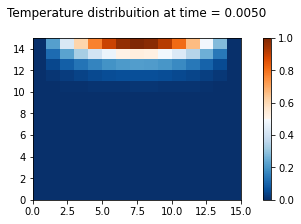

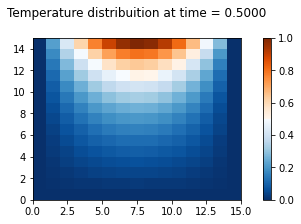

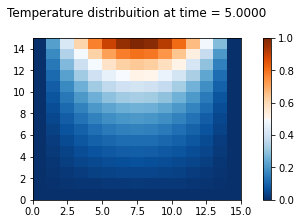

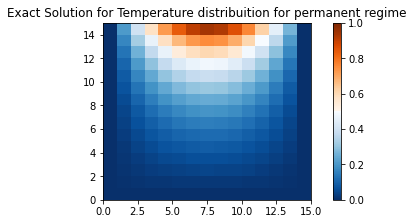

In [13]:
dx = dy = .07
dt = .001

time = [0., 0.005, 0.5, 5.]

x_arr = np.arange(0., 1., dx)
y_arr = np.arange(0., 1., dy)

n = len(x_arr)
m = len(y_arr)

Temp = np.zeros([m, n], float)
Temp_init_func = lambda x : np.sin(PI * x)

for i in range(m):
    Temp[-1][i] = Temp_init_func(x_arr[i])
    Temp[i][0] = 0. 
    Temp[i][-1] = 0. 
Temp = Temp[::-1]

result = finite_diff_bidimensional(Temp, time, dx, dy, dt)

Temp_exact = np.copy(Temp)
Temp_exact_func = lambda x, y : ((np.sinh(PI * y) * np.sin(PI * x)) / np.sinh(PI))

for i in range(n):
    for j in range(m - 1):
        Temp_exact[i][j] = Temp_exact_func(x_arr[j], y_arr[i])
        
exact_title = [f'Exact Solution for Temperature distribuition for permanent regime']

leg = []
for i in range(len(time)):
    leg.append(f'Temperature distribuition at time = {time[i]:.4f}\n')

plot_cmap(leg, result)
plot_cmap(exact_title, [Temp_exact])
plt.show()

#### Discussão

No exercício 6, colocamos uma das faces laterais nossa chapa fina, que a princípio estava em equilíbrio térmico com o ambiente, com uma fonte de calor cuja distribuição de calor segue a equação:

$$
T(x, 1, t) =  sin(\pi x), \ 0 \leq x \leq 1,\ \ t \geq 0
$$

Enquanto fazemos isso, mantemos as demais faces em equilíbrio térmico com o ambiente.

Intuitivamente, espera-se que haja uma região com maior temperatura próximo da fonte de calor e que a temperatura vá gradualmente diminuindo conforme nos afastamos da fonte de calor. 

Podemos observar o aumento da temperatura se propagando pela placa até que ela atinja um regime permanente, que é o observado nos dois últimos gráficos.

### Exercício 7

$$
\frac{\partial T}{\partial t} = \frac{\partial ^ 2T}{\partial x ^2} + \frac{\partial ^ 2T}{\partial y ^2},\ \ 0<x<0.5, \ \ t > 0
$$
$$
T(x, 0, t) =  0, \ 0 \leq x \leq 0.5,\ \ t \geq 0
$$
$$
T(x, 1, t) =  sin(\pi x), \ 0 \leq xy\leq 0.5,\ \ t \geq 0
$$
$$
T(0, y, t) = 0, \ 0 < y < 1,\ \ t \geq 0
$$

$$
\frac{\partial T}{\partial x}(0.5, y, t) = 0, \ 0 < x < 1,\ \ t \geq 0
$$

$$
T(x, y, 0) = 0, \ 0 < x < 0.5,\ 0 < y < 1
$$

sendo que a solução analítica para o problema é dada por:

$$
T(x, y, t \rightarrow \infty) = \frac{\sinh(\pi y) \sin(\pi x)}{\sinh(\pi)}
$$


In [14]:

def finite_diff_bidimensional(Temp, time, dx, dy, dt):
    n = len(Temp) - 1
    m = len(Temp[0]) - 1
    time_len = len(time)
    t = 0.
    Temp_new = np.copy(Temp)
    result = np.zeros([time_len, n + 1, m + 1])
        
    
    if dt <= (dx ** 2) / 4.  and dt <= (dy ** 2) / 4.:
        while t < time[-1] - 0.1 * dt:
            # print(f'Time = {t:.3f}')
            for i in range(1, n - 1):
                for j in range(1, m):
                    x_axis = (dt / (dx ** 2)) * (Temp[i + 1][j] - 2 * Temp[i][j] + Temp[i - 1][j])
                    y_axis = (dt / (dx ** 2)) * (Temp[i][j + 1] - 2 * Temp[i][j] + Temp[i][j - 1])
                    Temp_new[i][j] = Temp[i][j] + x_axis + y_axis
                    
                Temp_new[i][-1] = (Temp[i][-1] + ((dt / (dx ** 2)) * 
                            ( 2 * Temp[i][-2] - 2 * Temp[i][-1] )))
            
            for i in range(time_len):
                # print([time[i] - dt, t, time[i] + dt])
                # print(t < time[i] + dt  and t > time[i] - dt)
                if t < time[i] + dt  and t > time[i] - dt:
                    result[i] = np.copy(Temp_new[::-1])
                    # print(result[i])
                
            Temp = np.copy(Temp_new)
            t += dt
        
        return result
    
def plot_cmap(leg, result):
    '''Helper function to plot temperature color maps based on specific points in time'''
    # Creating a Blue to Orange color map 
    top = cm.get_cmap('Blues', 128)
    bottom = cm.get_cmap('Oranges_r', 128)
    new_colors = np.vstack((top(np.linspace(1, 0, 128)), bottom(np.linspace(1, 0, 128))))
    newcmp = ListedColormap(new_colors, name='BlueOrange')
    colormaps = [newcmp]
    
    cmap_len = len(colormaps)

    
    for i in range(len(result)):
        fig, axs = plt.subplots(1, cmap_len, figsize= (cmap_len * 2 + 2, 3), constrained_layout= True, squeeze= False)
        plt.title(leg[i])
        for [ax, cmap] in zip(axs.flat, colormaps):
            psm = ax.pcolormesh(result[i], cmap= cmap, rasterized= True, vmin= 0, vmax= 1)
            fig.colorbar(psm, ax= ax)

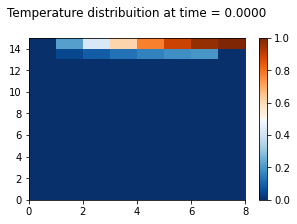

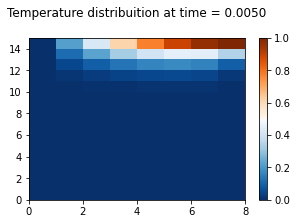

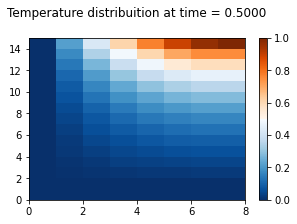

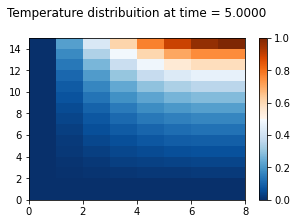

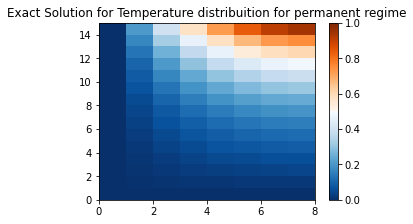

In [15]:
dx = dy = .07
dt = .001

time = [0., 0.005, 0.5, 5.]

x_arr = np.arange(0., .5, dx)
y_arr = np.arange(0., 1., dy)

n = len(y_arr)
m = len(x_arr)

Temp = np.zeros([n, m], float)
Temp_init_func = lambda x : np.sin(PI * x)

for i in range(m):
    Temp[-1][i] = Temp_init_func(x_arr[i])
for i in range(n):
    Temp[i][0] = 0.

Temp = Temp[::-1]

result = finite_diff_bidimensional(Temp, time, dx, dy, dt)

Temp_exact = np.copy(Temp)
Temp_exact_func = lambda x, y : ((np.sinh(PI * y) * np.sin(PI * x)) / np.sinh(PI))

for i in range(0, n):
    for j in range(0, m):
        Temp_exact[i][j] = Temp_exact_func(x_arr[j], y_arr[i])

exact_title = [f'Exact Solution for Temperature distribuition for permanent regime']

leg = []
for i in range(len(time)):
    leg.append(f'Temperature distribuition at time = {time[i]:.4f}\n')

plot_cmap(leg, result)
plot_cmap(exact_title, [Temp_exact])
plt.show()

#### Discussão

No exercício 7, cortamos a chapa do exercício 6 pela metade e isolamos a face cortada, desta forma, não esperamos mais que a temperatura seja mantida em equilíbrio com o ambiente, um vez que temos a condição de contorno de Neumann, e sim que similarmente, o aumento de temperatura também se propague pela extremidade direita da chapa.

Podemos observar a propagação nos gráficos e podemos observar que no regime permanente, as soluções analíticas e numéricas são similares.


### Exercício 8

In [16]:
def finite_diff_bidimensional(Temp, time, dx, dy, dt):
    n = len(Temp) - 1
    m = len(Temp[0]) - 1
    time_len = len(time)
    t = 0.
    Temp_new = np.copy(Temp)
    result = np.zeros([time_len, n + 1, m + 1])
        
    
    if dt <= (dx ** 2) / 4.  and dt <= (dy ** 2) / 4.:
        while t < time[-1] - 0.1 * dt:
            # print(f'Time = {t:.3f}')
            for i in range(1, n):
                for j in range(1, m):
                    x_axis = (dt / (dx ** 2)) * (Temp[i + 1][j] - 2 * Temp[i][j] + Temp[i - 1][j])
                    y_axis = (dt / (dx ** 2)) * (Temp[i][j + 1] - 2 * Temp[i][j] + Temp[i][j - 1])
                    Temp_new[i][j] = Temp[i][j] + x_axis + y_axis
                    
            for i in range(time_len):
                # print([time[i] - dt, t, time[i] + dt])
                # print(t < time[i] + dt  and t > time[i] - dt)
                if t < time[i] + dt  and t > time[i] - dt:
                    result[i] = np.copy(Temp_new[::-1])
                    # print(result[i])
                
            Temp = np.copy(Temp_new)
            t += dt
        
        return result
    
def plot_cmap_8(leg, result):
    '''Helper function to plot temperature color maps based on specific points in time'''
    # Creating a Blue to Orange color map 
    top = cm.get_cmap('Blues', 128)
    bottom = cm.get_cmap('Oranges_r', 128)
    new_colors = np.vstack((top(np.linspace(1, 0, 128)), bottom(np.linspace(1, 0, 128))))
    newcmp = ListedColormap(new_colors, name='BlueOrange')
    colormaps = [newcmp]
    
    cmap_len = len(colormaps)

    
    for i in range(len(result)):
        fig, axs = plt.subplots(1, cmap_len, figsize= (cmap_len * 2 + 2, 3), constrained_layout= True, squeeze= False)
        plt.title(leg[i])
        for [ax, cmap] in zip(axs.flat, colormaps):
            psm = ax.pcolormesh(result[i], cmap= cmap, rasterized= True, vmin= 0, vmax= 50)
            fig.colorbar(psm, ax= ax)

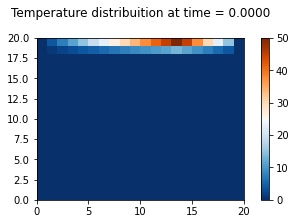

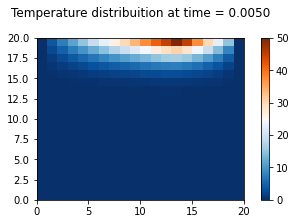

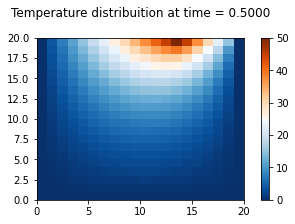

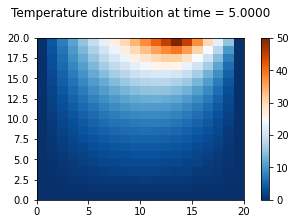

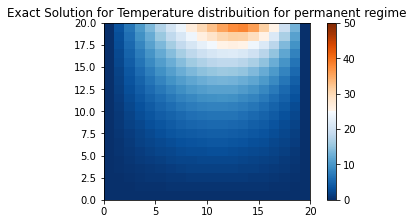

In [19]:
dx = dy = .05
dt = .000625

time = [0., 0.005, 0.5, 5.]

x_arr = np.arange(0., 1., dx)
y_arr = np.arange(0., 1., dy)

n = len(x_arr)
m = len(y_arr)

Temp = np.zeros([m, n], float)
Temp[-1][: round((2 / 3) * m)] = 75 * x_arr[: round((2 / 3) * m)]
Temp[-1][round((2 / 3) * m): ] = 150 * (1 - x_arr[round((2 / 3) * m):])

for i in range(m):
    Temp[i][0] = 0. 
    Temp[i][-1] = 0.
Temp = Temp[::-1]
# print(Temp)
result = finite_diff_bidimensional(Temp, time, dx, dy, dt)

Temp_exact = np.copy(Temp)


for i in range(n):
    for j in range(m - 1):
        Temp_exact[i][j] = (450 / (PI ** 2)) * nsum(lambda n : 
            (mp.sin((2 * n * PI) / 3) / ((n ** 2) * mp.sinh(n * PI))) * 
            mp.sin(n * PI * x_arr[j]) * 
            mp.sinh(n * PI * y_arr[i]), [1, inf])
        
exact_title = [f'Exact Solution for Temperature distribuition for permanent regime']

leg = []
for i in range(len(time)):
    leg.append(f'Temperature distribuition at time = {time[i]:.4f}\n')

plot_cmap_8(leg, result)
plot_cmap_8(exact_title, [Temp_exact])
plt.show()

#### Discussão

No exercício 8, aplicamos pontualmente calor na face superior da chapa em equilíbrio térmico com o ambiente à uma posição deslocada do centro como descrito pelas condições de contorno. Podemos observar, que temporalmente e espacialmente (no regime permanente ilustrado pelos dois últimos gráficos) que a temperatura vai progressivamente sendo elevada conforme analisamos pontos gradualmente mais distantes do ponto de aplicação. Como é de se esperar.

### Exercício 9

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

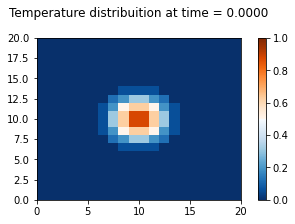

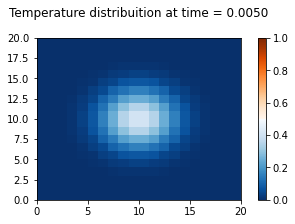

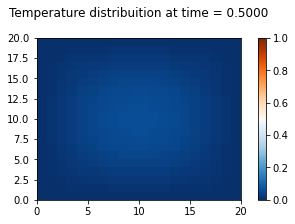

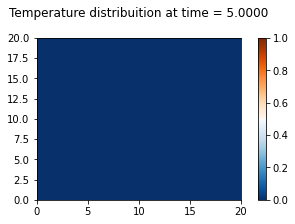

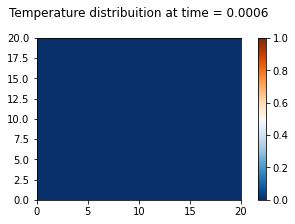

In [18]:
dx = dy = .05
dt = .000625

time = [dt, 0.005, 0.05, 0.5, 5.]

x_arr = np.arange(0., 1., dx)
y_arr = np.arange(0., 1., dy)

m = len(x_arr)
n = len(y_arr)

Temp = np.zeros([m, n], float)

for i in range(round(0.4 * n)):
    for j in range(round(0.4 * m)):
        Temp[i][j] = 0. 
for i in range(round(0.4 * n), round(0.6 * n)):
    for j in range(round(0.4 * m), round(0.6 * m)):
        Temp[i][j] = 1. 
for i in range(round(0.6 * n), n):
    for j in range(round(0.6 * m), m):
        Temp[i][j] = 0. 

for i in range(n):
    Temp[i][0] = 0. 
    Temp[i][-1] = 0.
    
for i in range(m):
    Temp[0][i] = 0. 
    Temp[-1][i] = 0.
    
Temp = Temp[::-1]
print(Temp)
result = finite_diff_bidimensional(Temp, time, dx, dy, dt)

for i in range(len(time)):
    leg.append(f'Temperature distribuition at time = {time[i]:.4f}\n')

plot_cmap(leg, result)

plt.show()

#### Discussão 

No exercício 9, podemos ilustrar a situação colocando um bloco quente com 200mm x 200mm x z mm no centro de uma chapa quadrada e fina com dimensões 1000mm x 1000mm x z mm previamente em equilbrio térmico com o ambiente. Retiramos o bloco no instante que começamos nossa análise.

Observe que a temperatura se propaga em todas as direções uniformemente, já que todas as faces laterais foram colocadas em contato com o ambiente e permitem a passagem de calor.

É interessante observar que a propagação de temperatura na chapa de certa forma se assemelha à propagação de momento linear (amplitude de onda) em um fluido no caso de perturbarmos instantaneamente seu centro, especialmente se tivermos analisando um fluido com alta viscosidade.